# Simple shapes

In [2]:
import sys
import numpy as np
import basic_functions as bf
import test_image_ellipsoid as tie
import bounding_box as bbox
import plot
import included_ellipsoid as ie
import bounding_ellipsoid as be
import scipy as scipy
from scipy import optimize
from scipy.optimize import minimize
from scipy.special import ellipkinc, ellipeinc
from importlib import reload
import indicators_calculation as ic

## 1. Cube

In [3]:
aggregate_coord = ([0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], 
                   [0.5, 0.5, 0], [0.5, 0.5, 1], [0.5, 0, 0.5], [0.5, 1, 0.5], [0, 0.5, 0.5], [1, 0.5, 0.5], [0.5, 0, 0])
print(aggregate_coord)
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

([0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0.5, 0.5, 0], [0.5, 0.5, 1], [0.5, 0, 0.5], [0.5, 1, 0.5], [0, 0.5, 0.5], [1, 0.5, 0.5], [0.5, 0, 0])


In [4]:
print(aggregate_coord.shape)

(15, 3)


### 1.1 Bounding box

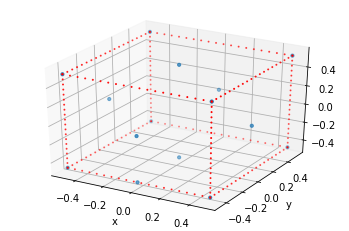

In [5]:
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate, 20, 10)

In [6]:
print(bbox_aggregate)

{'angles': array([0., 0.]), 'volume': 1.0}


### 1.2 Bounding ellipsoid

In [7]:
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord, 1e-3)

In [8]:
print(bounding_ellipsoid)

{'volume': 3.104478482830846, 'a': 0.90496826171875, 'b': 0.90496826171875, 'c': 0.90496826171875, 'bbox': {'angles': array([0., 0.]), 'volume': 1.0}}


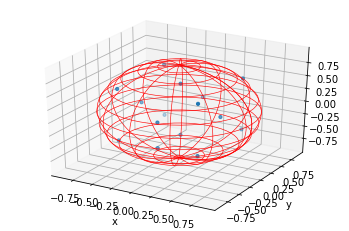

In [9]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid, 10)

### 1.3 Included ellipsoid

In [10]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-3)

In [11]:
print(included_ellipsoid)

{'volume': 0.429412916897326, 'a': 0.468017578125, 'b': 0.468017578125, 'c': 0.468017578125, 'bbox': {'angles': array([0., 0.]), 'volume': 1.0}}


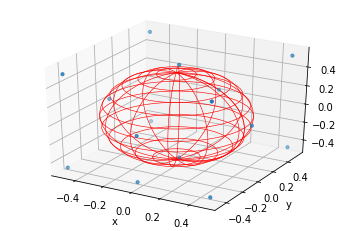

In [12]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid, 10)

### 1.4 Middle ellipsoid

In [13]:
middle_ellipsoid = bf.mid_ellipsoid(bounding_ellipsoid, included_ellipsoid)

In [14]:
print(middle_ellipsoid)

{'volume': 1.3551794173974159, 'a': 0.686492919921875, 'b': 0.686492919921875, 'c': 0.686492919921875}


### 1.5 Indicators

In [21]:
reload(ic)
reload(bf)
reload(plot)

<module 'plot' from 'C:\\Users\\dschmidt\\Documents\\GitHub\\Cuttings\\plot.py'>

In [16]:
distance = ic.roughness_distance(aggregate_coord, middle_ellipsoid)

In [17]:
tomo_surface = 6
tomo_volume = 1

Aggregate standard sphericity =  0.8059959770082347
Bounding box and ellispoids ratios :
a/b = 1.0
a/c = 1.0
b/c = 1.0
a^2/bc = 1.0
Bounding ellipsoid surface / Included ellipsoid surface = 3.7388872323762707
Aggregate tomographed surface / Bounding ellipsoid surface = 0.5830082358268089
Aggregate tomographed surface / Middle ellipsoid surface = 1.013139531354845
Aggregate tomographed surface / Included ellipsoid surface = 2.1798020493030696
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.17197946508674178
 
data min max
theta 0.0665681637758238 5.532256244781646
phi 0.06241880999595769 3.070285188804503
alpha 0.0665681637758238 5.532256244781646
beta 0.06241880999595769 3.070285188804503
distance -0.218637291667935 0.21843187744467363


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

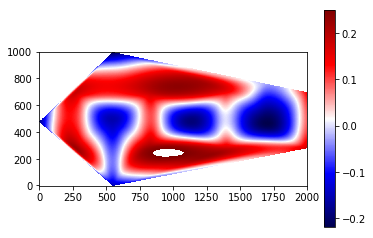

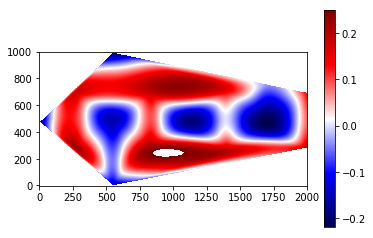

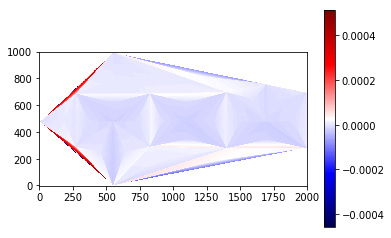

{'aggregate_standard_sphericity': 0.8059959770082347,
 'a/b': 1.0,
 'a/c': 1.0,
 'b/c': 1.0,
 'a^2/bc': 1.0,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 3.7388872323762707,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.5830082358268089,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.013139531354845,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 2.1798020493030696,
 'roughness_distance': array([[ 3.89252172,  2.16955651,  0.1414899 ,  3.89252172,  2.16955651],
        [ 5.53225624,  2.16955651,  0.1414899 ,  5.53225624,  2.16955651],
        [ 0.81764505,  2.13893458,  0.18081454,  0.81764505,  2.13893458],
        [ 2.32394761,  2.13893458,  0.18081454,  2.32394761,  2.13893458],
        [ 3.89252172,  0.90849919,  0.18081454,  3.89252172,  0.90849919],
        [ 5.53225624,  0.90849919,  0.18081454,  5.53225624,  0.90849919],
        [ 0.81764505,  0.94052054,  0.21843188,  0.81764505,  0.94052054],
        [ 2.32394761,  0.

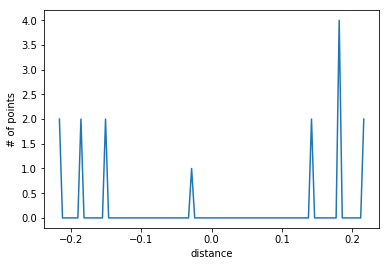

In [22]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.25)

## 2. Rod

In [24]:
aggregate_coord = ([0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 1000], [1, 0, 1000], [1, 1, 1000], [0, 1, 1000], 
                   [0.5, 0.5, 0], [0.5, 0.5, 1000], [0.5, 0, 500], [0.5, 1, 500], [0, 0.5, 500], [1, 0.5, 500], [0.5, 0, 0])
print(aggregate_coord)
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

([0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 1000], [1, 0, 1000], [1, 1, 1000], [0, 1, 1000], [0.5, 0.5, 0], [0.5, 0.5, 1000], [0.5, 0, 500], [0.5, 1, 500], [0, 0.5, 500], [1, 0.5, 500], [0.5, 0, 0])


In [25]:
print(aggregate_coord.shape)

(15, 3)


### 2.1 Bounding box

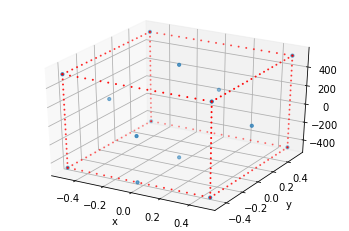

In [26]:
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate, 20, 10)

In [27]:
print(bbox_aggregate)

{'angles': array([0., 0.]), 'volume': 1000.0}


### 2.2 Bounding ellipsoid

In [28]:
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord, 1e-3)

In [29]:
print(bounding_ellipsoid)

{'volume': 3104.0313224264487, 'a': 0.9049248099327087, 'b': 0.9049248099327087, 'c': 904.9248099327087, 'bbox': {'angles': array([0., 0.]), 'volume': 1000.0}}


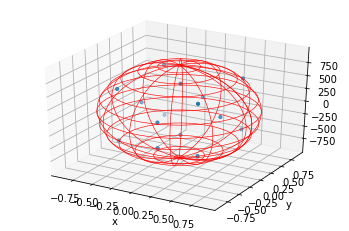

In [30]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid, 10)

### 2.3 Included ellipsoid

In [31]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-3)

In [32]:
print(included_ellipsoid)

{'volume': 428.9674721589529, 'a': 0.46785569190979004, 'b': 0.46785569190979004, 'c': 467.85569190979004, 'bbox': {'angles': array([0., 0.]), 'volume': 1000.0}}


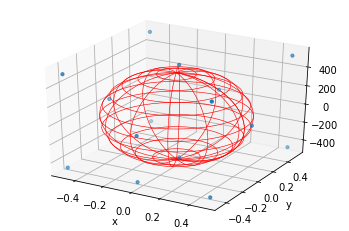

In [33]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid, 10)

### 2.4 Middle ellipsoid

In [34]:
middle_ellipsoid = bf.mid_ellipsoid(bounding_ellipsoid, included_ellipsoid)

In [35]:
print(middle_ellipsoid)

{'volume': 1354.571483484253, 'a': 0.6863902509212494, 'b': 0.6863902509212494, 'c': 686.3902509212494}


### 2.5 Indicators

In [36]:
reload(ic)
reload(bf)
reload(plot)

<module 'plot' from 'C:\\Users\\dschmidt\\Documents\\GitHub\\Cuttings\\plot.py'>

In [37]:
distance = ic.roughness_distance(aggregate_coord, middle_ellipsoid)

In [38]:
tomo_surface = 4002
tomo_volume = 1000

Aggregate standard sphericity =  0.12083897706270381
Bounding box and ellispoids ratios :
a/b = 1.0
a/c = 0.001
b/c = 0.001
a^2/bc = 0.001
Bounding ellipsoid surface / Included ellipsoid surface = 3.7411158371473
Aggregate tomographed surface / Bounding ellipsoid surface = 0.495167499040867
Aggregate tomographed surface / Middle ellipsoid surface = 0.8606665197988022
Aggregate tomographed surface / Included ellipsoid surface = 1.852478972702408
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 84.81909349973542
 
data min max
theta 0.0665681637758238 5.532256244781646
phi 6.249999993127386e-05 3.1415212250200892
alpha 0.06656816377582378 5.532256244781646
beta 0.06241881000856218 3.0702851903994577
distance -217.97926122780274 128.79729667747097


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

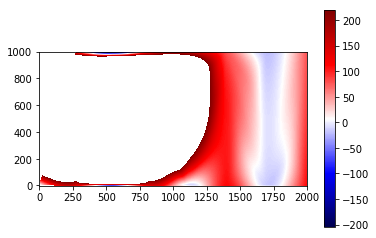

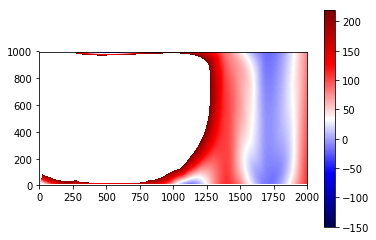

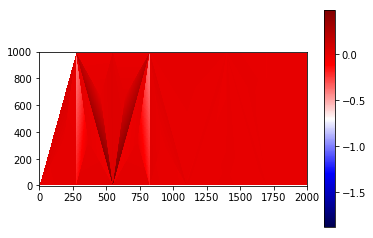

{'aggregate_standard_sphericity': 0.12083897706270381,
 'a/b': 1.0,
 'a/c': 0.001,
 'b/c': 0.001,
 'a^2/bc': 0.001,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 3.7411158371473,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.495167499040867,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 0.8606665197988022,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 1.852478972702408,
 'roughness_distance': array([[ 3.89252172e+00,  3.14012706e+00,  7.98043182e+01,
          3.89252172e+00,  2.16955651e+00],
        [ 5.53225624e+00,  3.14012706e+00,  7.98043182e+01,
          5.53225624e+00,  2.16955651e+00],
        [ 8.17645046e-01,  3.14002610e+00,  9.73451016e+01,
          8.17645046e-01,  2.13893458e+00],
        [ 2.32394761e+00,  3.14002610e+00,  9.73451016e+01,
          2.32394761e+00,  2.13893458e+00],
        [ 3.89252172e+00,  1.28239208e-03,  1.11251500e+02,
          3.89252172e+00,  9.08499189e-01],
        [ 5.53225624e+00,  

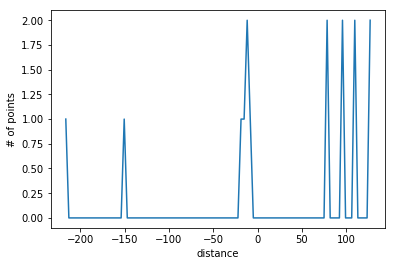

In [39]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=220)

## 3. Disc

In [40]:
aggregate_coord = ([0, 0, 0], [2, 0, 0], [2, 2, 0], [0, 2, 0], [0, 0, 1], [2, 0, 1], [2, 2, 1], [0, 2, 1], 
                   [1, 1, 0], [1, 1, 1], [1, 0, 0.5], [1, 2, 0.5], [0, 1, 0.5], [2, 1, 0.5], [1, 0, 0])
print(aggregate_coord)
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

([0, 0, 0], [2, 0, 0], [2, 2, 0], [0, 2, 0], [0, 0, 1], [2, 0, 1], [2, 2, 1], [0, 2, 1], [1, 1, 0], [1, 1, 1], [1, 0, 0.5], [1, 2, 0.5], [0, 1, 0.5], [2, 1, 0.5], [1, 0, 0])


In [41]:
print(aggregate_coord.shape)

(15, 3)


### 3.1 Bounding box

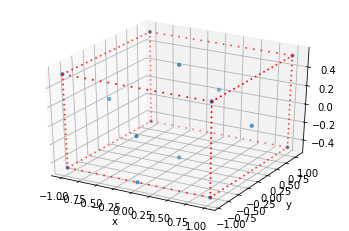

In [42]:
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate, 20, 10)

In [43]:
print(bbox_aggregate)

{'angles': array([0., 0.]), 'volume': 4.0}


### 3.2 Bounding ellipsoid

In [44]:
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord, 1e-3)

In [45]:
print(bounding_ellipsoid)

{'volume': 12.416029605899919, 'a': 1.809844970703125, 'b': 1.809844970703125, 'c': 0.9049224853515625, 'bbox': {'angles': array([0., 0.]), 'volume': 4.0}}


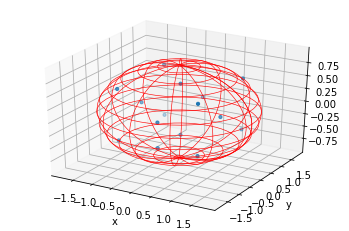

In [46]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid, 10)

### 3.3 Included ellipsoid

In [47]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-3)

In [48]:
print(included_ellipsoid)

{'volume': 1.7156364331438432, 'a': 0.9356689453125, 'b': 0.9356689453125, 'c': 0.46783447265625, 'bbox': {'angles': array([0., 0.]), 'volume': 4.0}}


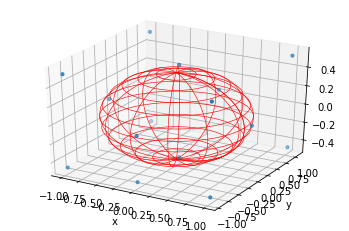

In [49]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid, 10)

### 3.4 Middle ellipsoid

In [50]:
middle_ellipsoid = bf.mid_ellipsoid(bounding_ellipsoid, included_ellipsoid)

In [51]:
print(middle_ellipsoid)

{'volume': 5.418007160221226, 'a': 1.3727569580078125, 'b': 1.3727569580078125, 'c': 0.6863784790039062}


### 3.5 Indicators

In [52]:
reload(ic)
reload(bf)
reload(plot)

<module 'plot' from 'C:\\Users\\dschmidt\\Documents\\GitHub\\Cuttings\\plot.py'>

In [53]:
distance = ic.roughness_distance(aggregate_coord, middle_ellipsoid)

In [54]:
tomo_surface = 16
tomo_volume = 4

Aggregate standard sphericity =  0.7616184731724444
Bounding box and ellispoids ratios :
a/b = 1.0
a/c = 2.0
b/c = 2.0
a^2/bc = 2.0
Bounding ellipsoid surface / Included ellipsoid surface = 3.741435989232748
Aggregate tomographed surface / Bounding ellipsoid surface = 0.5632793590905886
Aggregate tomographed surface / Middle ellipsoid surface = 0.9790824825957859
Aggregate tomographed surface / Included ellipsoid surface = 2.1074736660934845
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.2926021150701224
 
data min max
theta 0.0665681637758238 5.532256244781646
phi 0.12435499454676072 2.9996955989856295
alpha 0.0665681637758238 5.532256244781646
beta 0.062418809995956996 3.070285188804503
distance -0.4362129683810806 0.3758702887790515


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

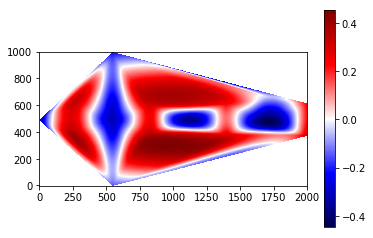

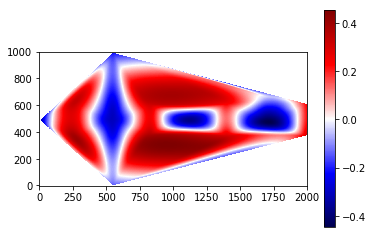

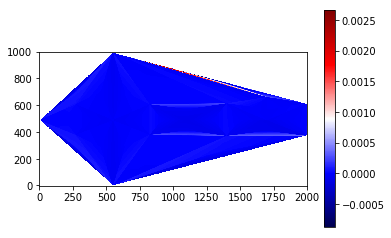

{'aggregate_standard_sphericity': 0.7616184731724444,
 'a/b': 1.0,
 'a/c': 2.0,
 'b/c': 2.0,
 'a^2/bc': 2.0,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 3.741435989232748,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.5632793590905886,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 0.9790824825957859,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 2.1074736660934845,
 'roughness_distance': array([[ 3.89252172,  1.89957348,  0.24717977,  3.89252172,  2.16955651],
        [ 5.53225624,  1.89957348,  0.24717977,  5.53225624,  2.16955651],
        [ 0.81764505,  1.87974848,  0.3201708 ,  0.81764505,  2.13893458],
        [ 2.32394761,  1.87974848,  0.3201708 ,  2.32394761,  2.13893458],
        [ 3.89252172,  1.1990304 ,  0.30627719,  3.89252172,  0.90849919],
        [ 5.53225624,  1.1990304 ,  0.30627719,  5.53225624,  0.90849919],
        [ 0.81764505,  1.22102568,  0.37587029,  0.81764505,  0.94052054],
        [ 2.32394761,  1.

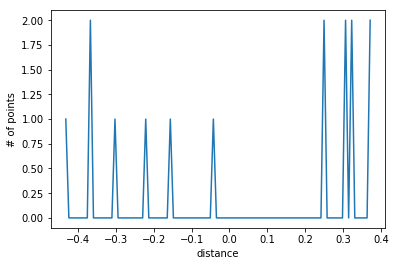

In [55]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.5)

## 4. Blade

In [56]:
aggregate_coord = ([0, 0, 0], [1000000, 0, 0], [1000000, 1, 0], [0, 1, 0], [0, 0, 1000], [1000000, 0, 1000], [1000000, 1, 1000], [0, 1, 1000], 
                   [500000, 0.5, 0], [500000, 0.5, 1000], [500000, 0, 500], [500000, 1, 500], [0, 0.5, 500], [1000000, 0.5, 500], [500000, 0, 0])
print(aggregate_coord)
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

([0, 0, 0], [1000000, 0, 0], [1000000, 1, 0], [0, 1, 0], [0, 0, 1000], [1000000, 0, 1000], [1000000, 1, 1000], [0, 1, 1000], [500000, 0.5, 0], [500000, 0.5, 1000], [500000, 0, 500], [500000, 1, 500], [0, 0.5, 500], [1000000, 0.5, 500], [500000, 0, 0])


In [57]:
print(aggregate_coord.shape)

(15, 3)


### 4.1 Bounding box

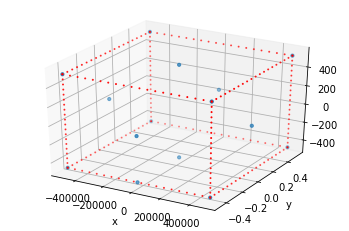

In [58]:
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate, 20, 10)

In [59]:
print(bbox_aggregate)

{'angles': array([0., 0.]), 'volume': 1000000000.0}


### 4.2 Bounding ellipsoid

In [60]:
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord, 1e-3)

In [61]:
print(bounding_ellipsoid)

{'volume': 3104031193.1144114, 'a': 904924.7973665048, 'b': 0.9049247973665047, 'c': 904.9247973665047, 'bbox': {'angles': array([0., 0.]), 'volume': 1000000000.0}}


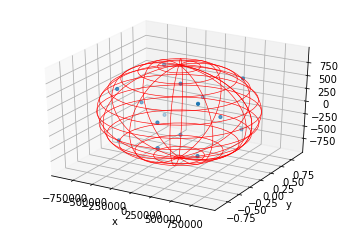

In [62]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid, 10)

### 4.3 Included ellipsoid

In [63]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-3)

In [64]:
print(included_ellipsoid)

{'volume': 428967297.06491506, 'a': 467855.6282540285, 'b': 0.4678556282540285, 'c': 467.8556282540285, 'bbox': {'angles': array([0., 0.]), 'volume': 1000000000.0}}


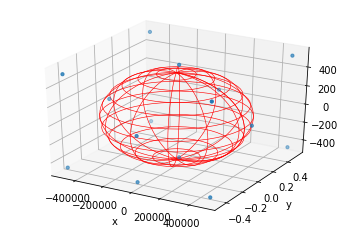

In [65]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid, 10)

### 4.4 Middle ellipsoid

In [66]:
middle_ellipsoid = bf.mid_ellipsoid(bounding_ellipsoid, included_ellipsoid)

In [67]:
print(middle_ellipsoid)

{'volume': 1354571257.8514693, 'a': 686390.2128102666, 'b': 0.6863902128102666, 'c': 686.3902128102666}


### 4.5 Indicators

In [68]:
reload(ic)
reload(bf)
reload(plot)

<module 'plot' from 'C:\\Users\\dschmidt\\Documents\\GitHub\\Cuttings\\plot.py'>

In [69]:
distance = ic.roughness_distance(aggregate_coord, middle_ellipsoid)

In [70]:
tomo_surface = 2002002000
tomo_volume = 1000000000

Aggregate standard sphericity =  0.0024155699455092475
Bounding box and ellispoids ratios :
a/b = 1000000.0000000001
a/c = 1000.0000000000001
b/c = 0.001
a^2/bc = 1000000000.0000004
Bounding ellipsoid surface / Included ellipsoid surface = 3.7411167512672603
Aggregate tomographed surface / Bounding ellipsoid surface = 0.3890970765424347
Aggregate tomographed surface / Middle ellipsoid surface = 0.6763021710180468
Aggregate tomographed surface / Included ellipsoid surface = 1.4556575909220217
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 79788.67649136508
 
data min max
theta 6.666666666666655e-08 6.283184373846253
phi 6.249999993127386e-05 3.1415212250200892
alpha 0.0665681637758238 5.532256244675813
beta 0.06241881000856218 3.0702851903994577
distance -183359.7780579069 120747.44195067888


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

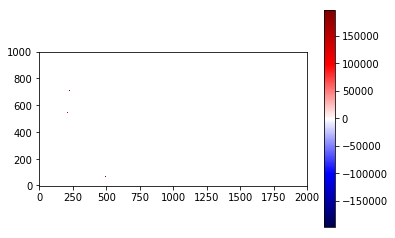

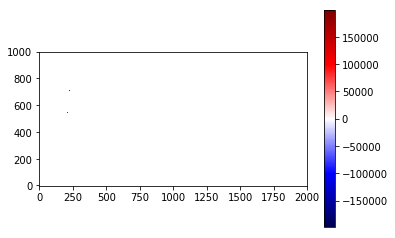

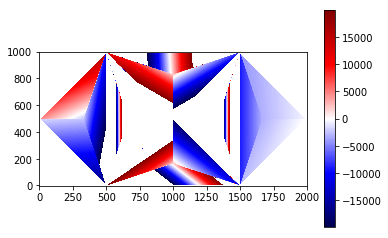

{'aggregate_standard_sphericity': 0.0024155699455092475,
 'a/b': 1000000.0000000001,
 'a/c': 1000.0000000000001,
 'b/c': 0.001,
 'a^2/bc': 1000000000.0000004,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 3.7411167512672603,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.3890970765424347,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 0.6763021710180468,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 1.4556575909220217,
 'roughness_distance': array([[ 3.14159359e+00,  1.57172966e+00,  8.55045951e+04,
          3.89252172e+00,  2.16955651e+00],
        [ 6.28318437e+00,  1.57172966e+00,  8.55045951e+04,
          5.53225624e+00,  2.16955651e+00],
        [ 1.06666667e-06,  1.57172966e+00,  1.04298263e+05,
          8.17645046e-01,  2.13893458e+00],
        [ 3.14159159e+00,  1.57172966e+00,  1.04298263e+05,
          2.32394761e+00,  2.13893458e+00],
        [ 3.14159359e+00,  1.56972966e+00,  1.04298276e+05,
          3.89252172e+0

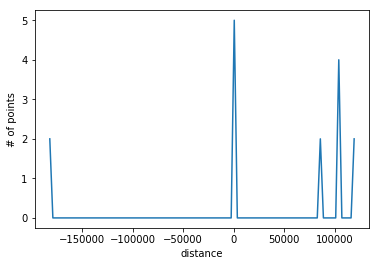

In [71]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=200000)